We will compute the DFT

$$ X(m) = \sum_{n=0}^{N-1} x(n)e^{-j2\pi nm/n}$$

Where:
* m is the discrete frequency variable
* n is the discrete time variable
* N is the total number of samples

Now we will implement it using Euler's identity

$$ X(m) = \sum_{n=0}^{N-1}x(n)\left[cos(2\pi nm/N) -jsin(2\pi nm/N)\right] $$

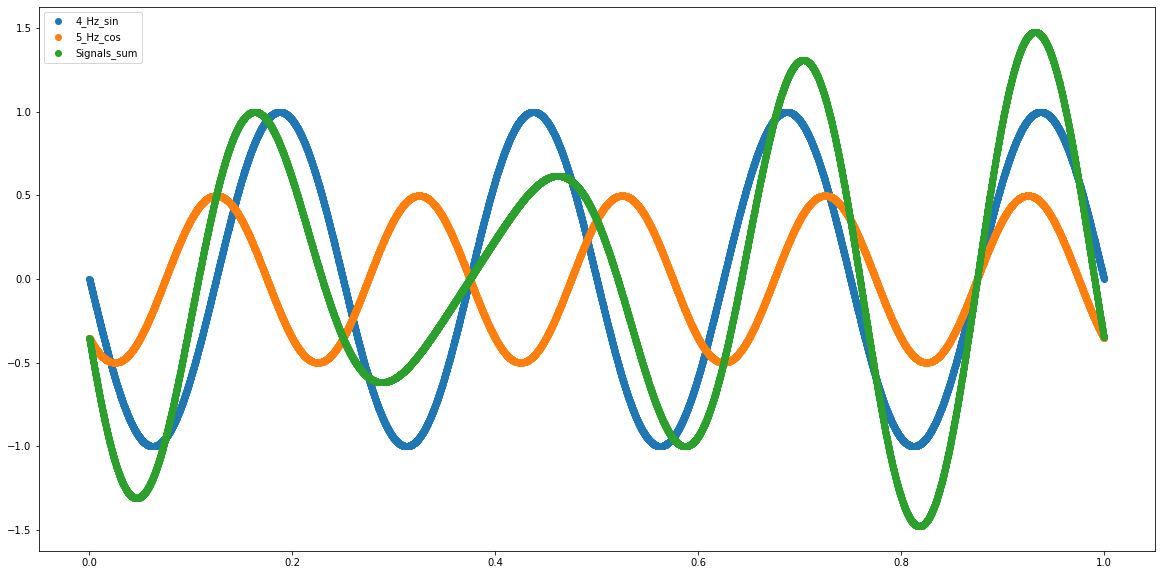

In [19]:
import numpy as np
np.set_printoptions(precision=4, suppress = True) # Suppress scientific notation
from numpy import pi,sin,cos
import matplotlib.pyplot as plt


class Sinusoidals:
    def __init__(self, fs = 10000, total_time = 1, compute_sum = True, **kwargs):
        
        '''
        	kwargs : Dictionary  with sinusoidal parameters, (A, freq, phi, sin or cos)
        '''
        self.fs = fs
        self.total_time = total_time
        self.signals = kwargs
   
        self.ts = 1/fs
        self.total_samples = fs * total_time
        self.N = np.arange(self.total_samples)

        self.compute_sum = compute_sum
        self.sinusoidals = {}
        
        self.gen_sinusoidals()
        
	
    def __call__(self):
        self.plot_signals()

    def gen_sinusoidals(self):
        if self.signals:
            function = {'sin':sin, 'cos':cos}
            total_signals = len(self.signals)
            for A, freq, phi, sinu in self.signals.values():
                self.sinusoidals[str(freq)+'_Hz_'+sinu] = A*function[sinu](2*pi*freq*self.ts*self.N + phi)
            
            if self.compute_sum:
                self.sinusoidals['Signals_sum'] = sum(self.sinusoidals.values())
                
            return self.sinusoidals
        
        else:
            print("There are no signals to generate.")
    
    def plot_signals(self):
        if self.signals:
            total_sinusoidals = len(self.sinusoidals)
            _, ax = plt.subplots(figsize = (20,10))
            for key, value in self.sinusoidals.items():
                ax.plot(self.N*self.ts, value, 'o', label = key)
            
            ax.legend()
            plt.show()
                
            
        else:
            print("There are no signals to plot.")
    
    def DFT(self, signal):
        ''' 
        	Magnitude and phase of all sinusoidals 
        '''
        pass
    
    
signal_1 = Sinusoidals(**{'y1':(1,4,pi,'sin'), 'y2':(0.5,5,3/4*pi,'cos')})

signal_1()

    